CCA should be done if there is < 5% data missing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')

df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [4]:
df.shape

(19158, 13)

In [5]:
cols =[ var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean() >0]

cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
16164,0.680,no_enrollment,Masters,3.0,51.0
14887,0.926,NaN,Masters,10.0,58.0
5003,0.624,Full time course,Graduate,3.0,38.0
4809,0.804,no_enrollment,Graduate,13.0,72.0
8048,0.939,no_enrollment,Graduate,2.0,32.0


In [14]:
print(len(df[cols].dropna())/len(df)*100)


89.68577095730244


In [11]:
new_df = df[cols].dropna()

df.shape, new_df.shape

((19158, 13), (17182, 5))

<Axes: >

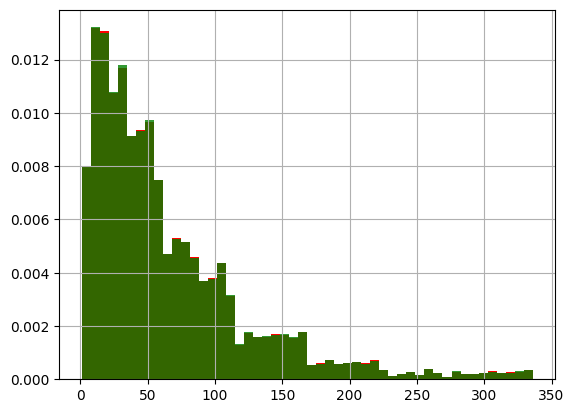

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)


df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')


new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [16]:
temp = pd.concat([
         
            df['education_level'].value_counts() / len(df),

         
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)


temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
